Notes:
11/30/21 WIP method structure

In [1]:
# imports
import numpy as np
from datetime import date
from datetime import timedelta
import pandas as pd
import xarray as xr
import Nio

In [2]:
# writing to files
from datetime import date
time = date.today()
case = '1996122500'
stat = 'precip'
region = 'CA/NV'
stats = []


header = ['Date','Case','Run','Region','Type','Bias','RMSE']
filename = "precip_all.csv"

In [3]:
# CA/NV for wrf
def ca_nv(dataarray):
    lat_drop = dataarray.where(dataarray.lat < 42, drop = True)
    lat_drop = lat_drop.where(lat_drop.lat > 31, drop = True)
    lon_drop = lat_drop.where(lat_drop.lon < -114, drop = True)
    return lon_drop

In [4]:
# difference function
def diff(num_str, day, table, out):
        fn = '/cw3e/mead/projects/cwp103/scratch/ldehaan/Livneh/livneh_unsplit_precip.2021-05-02.1996.nc'
        fn2 = '/cw3e/mead/projects/cwp103/scratch/ldehaan/Livneh/livneh_unsplit_precip.2021-05-02.1997.nc'
        liv_file = ca_nv(xr.open_dataset(fn))
        liv_file2 = ca_nv(xr.open_dataset(fn2))
        if day > 300:
            liv = liv_file['PRCP'][day].data.flatten()
        else:
            liv = liv_file2['PRCP'][day].data.flatten()
        subtr = np.subtract(np.array(table[num_str]), liv)
        out[num_str] = subtr

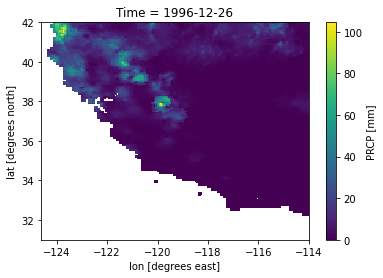

In [5]:
fn = '/cw3e/mead/projects/cwp103/scratch/ldehaan/Livneh/livneh_unsplit_precip.2021-05-02.1996.nc'
liv_file = ca_nv(xr.open_dataset(fn))
liv_file['PRCP'][360].plot()

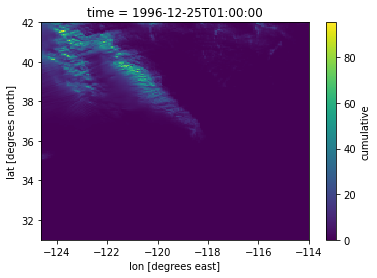

In [6]:
fn2 = ca_nv(xr.open_dataarray('./wrf_1996122500_NG-GR-YQ-BD_precip_regrid_1996-12-26.nc'))
fn2.plot()

In [7]:
def calc(run):
    # reading in regridded files
    pc1 =  ca_nv(xr.open_dataarray('./wrf_1996122500_'+run+'_precip_regrid_1996-12-25.nc'))
    pc2 =  ca_nv(xr.open_dataarray('./wrf_1996122500_'+run+'_precip_regrid_1996-12-26.nc'))
    pc3 =  ca_nv(xr.open_dataarray('./wrf_1996122500_'+run+'_precip_regrid_1996-12-25.nc'))
    pc4 =  ca_nv(xr.open_dataarray('./wrf_1996122500_'+run+'_precip_regrid_1996-12-27.nc'))
    pc5 =  ca_nv(xr.open_dataarray('./wrf_1996122500_'+run+'_precip_regrid_1996-12-28.nc'))
    pc6 =  ca_nv(xr.open_dataarray('./wrf_1996122500_'+run+'_precip_regrid_1996-12-29.nc'))
    pc7 =  ca_nv(xr.open_dataarray('./wrf_1996122500_'+run+'_precip_regrid_1996-12-30.nc'))
    pc8 =  ca_nv(xr.open_dataarray('./wrf_1996122500_'+run+'_precip_regrid_1996-12-31.nc'))
    pc9 =  ca_nv(xr.open_dataarray('./wrf_1996122500_'+run+'_precip_regrid_1997-01-01.nc'))
    pc10 =  ca_nv(xr.open_dataarray('./wrf_1996122500_'+run+'_precip_regrid_1997-01-02.nc'))
    pc11 =  ca_nv(xr.open_dataarray('./wrf_1996122500_'+run+'_precip_regrid_1997-01-03.nc'))
    pc12 =  ca_nv(xr.open_dataarray('./wrf_1996122500_'+run+'_precip_regrid_1997-01-04.nc'))
    
    # flatten arrays
    p1 = pc1.data.flatten()
    p2 = pc2.data.flatten()
    p3 = pc3.data.flatten()
    p4 = pc4.data.flatten()
    p5 = pc5.data.flatten()
    p6 = pc6.data.flatten()
    p7 = pc7.data.flatten()
    p8 = pc8.data.flatten()
    p9 = pc9.data.flatten()
    p10 = pc10.data.flatten()
    p11 = pc11.data.flatten()
    p12 = pc12.data.flatten()
    
    df_vals = {'p1':p1, 'p2':p2, 'p3':p3, 'p4':p4, 'p5':p5, 'p6':p6,
               'p7':p7, 'p8':p8, 'p9':p9, 'p10':p10, 'p11':p11, 'p12':p12}
    
    # creating input and output dataframes
    df = pd.DataFrame(df_vals)
    df_out = pd.DataFrame()
    wrf_days = ['p1','p2','p3','p4','p5','p6','p7','p8','p9','p10','p11','p12']
    liv_days = [359,360,361,362,363,364,365,1,2,3,4]
    for i in np.arange(len(liv_days)):
        diff(wrf_days[i],liv_days[i],df,df_out)
    
    # calculations
    bias = df_out.values.flatten()[~np.isnan(df_out.values.flatten())].mean()
    df_out_edit = df_out.values.flatten()[~np.isnan(df_out.values.flatten())]
    sq_all = np.square(df_out_edit)
    rmse = np.sqrt(sq_all.mean())
    
    # rounding
    bias = round(bias,2)
    rmse = round(rmse,2)
    
    # output
    newline = [time,case,run,region,stat,bias,rmse]
    stats.append(newline)
    
    # output messages
    print('Finished:')
    print(newline)

In [8]:
lst_19 = ['NG-GR-YQ-BD','OO-6D','OO-CO','OO-SC','PH-MO-GF-MY','PH-MO-TK-MY',
      'PH-TH-GF-MY','PH-TH-TK-MY','NG-GR-NQ-PO','NG-GR-YQ-PO','OO-CC',
      'NG-GR-NQ-BD','OO-NP','OO-VC','PH-MO-GF-YU','PH-MO-TK-YU','PH-TH-GF-YU','PH-TH-TK-YU',
      'NC-TH-GF-MY','CC-TH-GF-MY'] # missing CC-TA due to missing files for this case
for i in lst_19:
    calc(i)

Finished:
[datetime.date(2022, 2, 10), '1996122500', 'NG-GR-YQ-BD', 'CA/NV', 'precip', -1.03, 20.91]
Finished:
[datetime.date(2022, 2, 10), '1996122500', 'OO-6D', 'CA/NV', 'precip', 1.57, 22.23]
Finished:
[datetime.date(2022, 2, 10), '1996122500', 'OO-CO', 'CA/NV', 'precip', 1.75, 22.34]
Finished:
[datetime.date(2022, 2, 10), '1996122500', 'OO-SC', 'CA/NV', 'precip', 1.69, 22.39]
Finished:
[datetime.date(2022, 2, 10), '1996122500', 'PH-MO-GF-MY', 'CA/NV', 'precip', 1.63, 21.69]
Finished:
[datetime.date(2022, 2, 10), '1996122500', 'PH-MO-TK-MY', 'CA/NV', 'precip', 1.81, 21.85]
Finished:
[datetime.date(2022, 2, 10), '1996122500', 'PH-TH-GF-MY', 'CA/NV', 'precip', 2.06, 22.95]
Finished:
[datetime.date(2022, 2, 10), '1996122500', 'PH-TH-TK-MY', 'CA/NV', 'precip', 2.12, 23.18]
Finished:
[datetime.date(2022, 2, 10), '1996122500', 'NG-GR-NQ-PO', 'CA/NV', 'precip', 1.72, 22.35]
Finished:
[datetime.date(2022, 2, 10), '1996122500', 'NG-GR-YQ-PO', 'CA/NV', 'precip', 0.91, 22.04]
Finished:
[dateti

In [11]:
# reading in other files for other cases, different method
import os
def read_files(year, run):
    prefixed = [filename for filename in os.listdir('.') if filename.startswith('wrf_' + year + '_' + run)]
    for i in range(len(prefixed)):
        prefixed[i] = ca_nv(xr.open_dataarray(prefixed[i])).data.flatten()
    return prefixed

# A more abstract difference function (no year splits)
def diff_abstract(year_num, num_str, day, table, out):
        fn = '/cw3e/mead/projects/cwp103/scratch/ldehaan/Livneh/livneh_unsplit_precip.2021-05-02.'+year_num+'.nc'
        liv_file = xr.open_dataset(fn)
        liv = ca_nv(liv_file['PRCP'][day]).data.flatten()
        subtr = np.subtract(np.array(table[num_str]), liv)
        out[num_str] = subtr
        
# A more abstract version of calculations
def calc_abstract(year, year_num, run, liv_days):
    # reading in regridded files
    files = read_files(year, run)
    
    # indexing
    df_vals = {'p1':files[0], 'p2':files[1], 'p3':files[2], 'p4':files[3], 'p5':files[4], 'p6':files[5],
               'p7':files[6], 'p8':files[7], 'p9':files[8], 'p10':files[9], 'p11':files[10]}
    
    # creating input and output dataframes
    df = pd.DataFrame(df_vals)
    df_out = pd.DataFrame()
    wrf_days = ['p1','p2','p3','p4','p5','p6','p7','p8','p9','p10','p11']
    for i in np.arange(len(liv_days)):
        diff_abstract(year_num, wrf_days[i],liv_days[i],df,df_out)
    
    # calculations
    bias = df_out.values.flatten()[~np.isnan(df_out.values.flatten())].mean()
    df_out_edit = df_out.values.flatten()[~np.isnan(df_out.values.flatten())]
    sq_all = np.square(df_out_edit)
    rmse = np.sqrt(sq_all.mean())
    
    # rounding
    bias = round(bias,2)
    rmse = round(rmse,2)
    
    # output
    newline = [time,case,run,region,stat,bias,rmse]
    stats.append(newline)
    
    # output messages
    print('Finished:')
    print(newline)

In [12]:
# 2010 cloud case
lst = ['NG-GR-YQ-BD','OO-6D','OO-CO','OO-SC','PH-MO-GF-MY','PH-MO-TK-MY',
      'PH-TH-GF-MY','PH-TH-TK-MY','NG-GR-NQ-PO','NG-GR-YQ-PO','OO-CC',
      'NG-GR-NQ-BD','OO-NP','OO-VC','PH-MO-GF-YU','PH-MO-TK-YU','PH-TH-GF-YU','PH-TH-TK-YU',
       'CC-TA-GF-MY','NC-TH-GF-MY','CC-TH-GF-MY']
case = '2010070700'
year_num = '2010'
liv = [186,187,188,189,190,191,192,193,194,195,196]
for i in lst:
    calc_abstract(case,year_num,i,liv)

# 2007 wind case
case = '2007101800'
year_num = '2007'
liv = [290,291,292,293,294,295,296,297,298,299,300]
for i in lst:
    calc_abstract(case,year_num,i,liv)
    
# 2006 heat case
case = '2006072000'
year_num = '2006'
liv = [200,201,202,203,204,205,206,207,208,209,210]
for i in lst:
    calc_abstract(case,year_num,i,liv)

# 2017 AR case
case = '2017020500'
year_num = '2017'
liv = [35,36,37,38,39,40,41,42,43,44,45]
for i in lst:
    calc_abstract(case,year_num,i,liv)

Finished:
[datetime.date(2022, 2, 10), '2010070700', 'NG-GR-YQ-BD', 'CA/NV', 'precip', -0.04, 0.46]
Finished:
[datetime.date(2022, 2, 10), '2010070700', 'OO-6D', 'CA/NV', 'precip', 0.04, 0.61]
Finished:
[datetime.date(2022, 2, 10), '2010070700', 'OO-CO', 'CA/NV', 'precip', 0.07, 0.68]
Finished:
[datetime.date(2022, 2, 10), '2010070700', 'OO-SC', 'CA/NV', 'precip', 0.08, 0.71]
Finished:
[datetime.date(2022, 2, 10), '2010070700', 'PH-MO-GF-MY', 'CA/NV', 'precip', 0.15, 0.84]
Finished:
[datetime.date(2022, 2, 10), '2010070700', 'PH-MO-TK-MY', 'CA/NV', 'precip', 0.13, 0.76]
Finished:
[datetime.date(2022, 2, 10), '2010070700', 'PH-TH-GF-MY', 'CA/NV', 'precip', 0.08, 0.71]
Finished:
[datetime.date(2022, 2, 10), '2010070700', 'PH-TH-TK-MY', 'CA/NV', 'precip', 0.07, 0.69]
Finished:
[datetime.date(2022, 2, 10), '2010070700', 'NG-GR-NQ-PO', 'CA/NV', 'precip', 0.09, 0.75]
Finished:
[datetime.date(2022, 2, 10), '2010070700', 'NG-GR-YQ-PO', 'CA/NV', 'precip', 0.04, 0.68]
Finished:
[datetime.date(20

In [13]:
# writing to csv file 
import csv 
with open(r'precip_all.csv', 'a', newline='') as csvfile: 
    # creating a csv writer object 
    csvwriter = csv.writer(csvfile) 
    
    # writing the data rows 
    csvwriter.writerows(stats)